# TP sur les méthodes d'interpolation numérique

Dans cette partie, on nous donne un nombre fini (n+1) points du plan et on nous demande de construire une courbe passant par ces points. En effet, nous l'aurons compris qu'à l'inverse du principe des moindres carrés, il ets question de mettre en ouevre une courbe passant forcément par ces points là. Ces points, perçu sous un angle pratique, nous les appelons des abscisses d'une fonction arbitraire f tel que définit dans le cours. En suite, on cherchera à remplacer cette fonction par une fonction plus simple noté g et qui permettra d'estimer f sur des abscisses différentes faisant allusionn à une sorte de données expérimentales, pour lesquelles nous viserons à obtenir empiriquement une loi de distribution lorsque les nombres trouvés seront important.

En plus simple et de façon plus intéressante, je dirai que, étant donné plusieurs fonctions que nous connaissons et que nous manipulons très souvent, dont les fonctions trigonométriques par excellence que nous définissons dans le domaine de l'analyse mathématique (cos, sin, log, exp, etc.), ne sont en réalité pas connues de manière exactes en tout point x appartenant à R. c'est pourquoi la plus part des algorithmes de calculs les remplacent par des fonctions que nous sommes à mesure de calculer grâce à l'uilisation des polynomes.

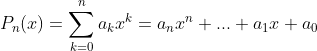

## 1) La méthode d'interpolation de Lagrange

On vellei d'abord à ce que f appartienne à $$  C^{0}([a,b],R)$$ et, $$x_{0},x_{1},...,x_{n}$$ appartiennent à $$ [a,b] n+1$$ points distincts avec n>=0 entier positifs. On cherche ensuite à construire le polynome P_{n} de degré inférieur ou égale à n solution tel que la formule de Lagrange se présente comme suite : $$P_{n}(x_{i})=\sum_{i=0}^{n}f(x_{i})L_{i}(x)$$ avec $$L_{i}=\prod_{j=0_{j<>i}}^{n}\frac{x-x_{j}}{x_{i}-x_{j}}$$ et i=0, 1, ..., n
par conséquent nous allons construire :  $$P_{n}(x_{i})=\sum_{i=0}^{n}(f(x_{i})(\prod_{j=0_{j<>i}}^{n}\frac{x-x_{j}}{x_{i}-x_{j}}))$$

Nous allons alors essayer de determiner le polynome P en partant des 3 points suivants : (-1;0,5);(0,1) et (1;-1).

In [74]:
import matplotlib.pylab as plt
%matplotlib inline
import numpy as np

def lagrange(x_cherche,x,y):
    x_donne=np.array(x)
    y=np.array(y)    
    p=0
    n=len(x_donne)
    L=[1 for i in range(n)]
    for i in range(n):
        for j in range(n):
            if j!=i:
                L[i]*=(x_cherche-x_donne[j])/(x_donne[i]-x_donne[j])
        p += y[i]*L[i]
    return p

pour x =0, Pn(X)=1.0
pour x =1, Pn(X)=-1.0
pour x =2, Pn(X)=-5.5
pour x =3, Pn(X)=-12.5
pour x =4, Pn(X)=-22.0


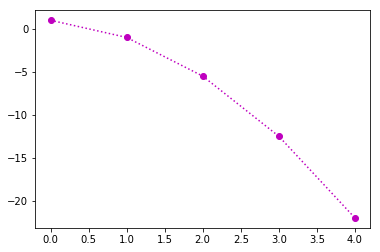

In [75]:
x=[-1,0,1]
y=[0.5,1,-1]
courbe = [] #notre fameuse courbe!
#nous calculons ici le polynome de langrage 
#en plusieurs point, de façon séparée
#autrement, quand x=0,1,2,...
for t in range(0,5) :
    l=lagrange(t,x,y)
    courbe.append(l)
    print("pour x ="+str(t)+", Pn(X)="+str(l))
plt.plot(courbe,'o:m')
plt.show()

En effet si nous comparrons avec ce que nous avons trouvé au cours c'est à dire qu'avec x=0 et le polynome  
$$P_{2}(X)=\frac{1}{4}(-5(x^2)-3x+4)$$ on $$P_{2}(0)=1$$

Poitn de vue personnel : Cette méthode semble moins algorithmique, il vous suffit juste de remarqur son évaluation qui requiert trop d'opérations élémentaires.

## 2) La méthode d'interpolation barycentrique

In [107]:
def points(x):
    w=np.ones(np.size(x))
    n=np.size(x)
    for i in range(n):
        for j in range(n):
            if i!=j:
                w[i]=(x[i]-x[j])*w[i]
    return 1./w

In [108]:
def barycentrique(x,y,xx):
    n=np.size(x)
    m=np.size(xx)
    nu=np.zeros(m)
    de=np.zeros(m)
    v=(0!=de)
    point=points(x)
    for i in range(n):
        dx=xx-x[i]
        v=v+(dx==0)
        dx[dx==0]=1
        nu=nu+y[i]*point[i]/dx
        de=de+point[i]/dx
    s=nu/de
    for j in np.transpose(np.nonzero(v)):
        s[j]=y[np.transpose(np.nonzero((x-xx[j])==0))]
    return s

[-0.83907153 -0.9043279  -0.95331525 -0.9851523  -0.99926629 -0.99540331
 -0.97363285 -0.93434657 -0.87825124 -0.80635602 -0.71995431 -0.62060051
 -0.51008199 -0.39038701 -0.2636689  -0.13220735  0.00163264  0.13544326
  0.26681723  0.39339111  0.51288782  0.62315759  0.72221665  0.8082829
  0.87980801  0.93550522  0.97437254  0.99571072  0.9991359   0.98458646
  0.95232413  0.90292933  0.83729068  0.75658902  0.6622762   0.55604892
  0.43981822  0.31567512  0.18585296  0.05268728 -0.08142625 -0.21407491
 -0.34287232 -0.46550141 -0.57975604 -0.68358077 -0.77510776 -0.85269042
 -0.91493305 -0.96071587 -0.98921524 -0.99991847 -0.99263299 -0.96748987
 -0.92494145 -0.86575317 -0.79098984 -0.70199647 -0.60037407 -0.48795083
 -0.36674927 -0.23894983 -0.10685164  0.02716882  0.16070052  0.29134118
  0.41674057  0.53464272  0.64292656  0.73964404  0.8230552   0.89165946
  0.9442226   0.97979902  0.99774869  0.99774869  0.97979902  0.9442226
  0.89165946  0.8230552   0.73964404  0.64292656  0.5

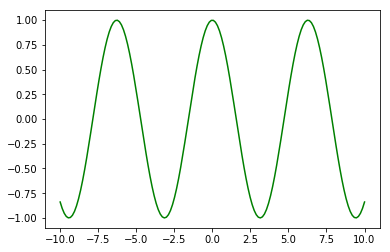

In [115]:
xx=np.linspace(-10,10,150)
x=np.linspace(-10,10,150)
b=barycentrique(x,np.cos(x),xx)
print(b)
plt.plot(xx,b,'g')

## 3) Méthode d'interpolation d'Aitken

$$P_{i+1,j}(\alpha)=\frac{(x_{i+j+1}-\alpha)P_{i,j}(\alpha)-(x_j-\alpha)P_{i,j+1}(\alpha)}{x_{i+j+1}-x_j}$$

In [87]:
def P(i,j,alpha,points):
    print(i,j)
    x = [p[0] for p in points]
    y = [p[1] for p in points]
    if i==0:
        return y[j]
    else:
        return ((x[i+j]-alpha)*P(i-1,j,alpha,points)-(x[j]-alpha)*P(i-1,j+1,alpha,points))/(x[i+j]-x[j])

In [117]:
points = [(-1,0.5),(0,1),(1,-1)]
P(2,0,4,points)

2 0
1 0
0 0
0 1
1 1
0 1
0 2


-22.0

Définition de la fonction qui calcule par récursion

In [89]:
def P_opt(i,j,alpha,points):
    if not (i,j) in Pmem: # Elle n'a pas été calculée
        x = [p[0] for p in points]
        y = [p[1] for p in points]
        # On la calcule, on la mémorise
        print (i,j)
        if i==0:
            Pmem[(i,j)]=y[j]
        else:
            Pmem[(i,j)]=((x[i+j]-alpha)*P_opt(i-1,j,alpha,points)-(x[j]-alpha)*P_opt(i-1,j+1,alpha,points))/(x[i+j]-x[j])
            
    return Pmem[(i,j)] # On la renvoie

On définit les points

On efface la structure de mémorisation

On appelle la fonction récursive

In [118]:
points = [(-1,0.5),(0,1),(1,-1)]
Pmem = dict()
P_opt(2,0,1.5,points)

2 0
1 0
0 0
0 1
1 1
0 2


-2.9375

On affiche la structure de mémorisation

Les éléments à la fin de chaque ligne affiche la valeur de l'interpolation, sur le dernier points, puis sur les deux derniers points, puis sur les 3 derniers points, puis sur les 4

In [96]:
for j in range(len(points),0,-1):
    print([Pmem[i,j-1] for i in range(len(points)-j+1)])
%timeit()

[-1]
[1, -2.0]
[0.5, 1.75, -2.9375]
10000000 loops, best of 3: 18.7 ns per loop
